# Reconstruction using GraphEM

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging HadCRUT4 and PAGES2k.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

## Low-level workflow

In [3]:
job = GraphEM.ReconJob()

In [4]:
job.load_configs('./testcases/PAGES2k_HadCRUT/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_HadCRUT/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1970, 2000],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'},
 'obs_varname': {'tas': 'tas_mean'},
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'ptype_list': ['coral.d18O',
                'coral.SrCa',
                'coral.calc',
                'tree.TRW',
                'tree.MXD'],
 'recon_period': [1500, 2000]}


In [5]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/proxy/pages2k_dataset.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


In [6]:
job.filter_proxydb(verbose=True)

GraphEM: job.filter_proxydb() >>> filtering proxy records according to: ['coral.d18O', 'coral.SrCa', 'coral.calc', 'tree.TRW', 'tree.MXD']
GraphEM: job.filter_proxydb() >>> 510 records remaining


In [7]:
# ptype_season = {}
# for k, v in job.proxydb.type_dict.items():
#     ptype_season[k] = list(range(1, 13)) # annual
    
# job.seasonalize_proxydb(ptype_season, verbose=True)
job.seasonalize_proxydb(verbose=True)

GraphEM: job.seasonalize_proxydb() >>> job.configs["ptype_season"] = {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> seasonalizing proxy records according to: {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> 510 records remaining
GraphEM: job.seasonalize_proxydb() >>> job.proxydb updated


In [8]:
job.load_obs(varname_dict={'lat': 'latitude', 'lon': 'longitude', 'tas': 'tas_mean'}, verbose=True)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'}
GraphEM: job.load_obs() >>> job.obs created


In [9]:
job.seasonalize_obs(verbose=True)

GraphEM: job.seasonalize_obs() >>> job.configs["obs_season"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
GraphEM: job.seasonalize_obs() >>> seasonalized obs w/ season [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
    Shape:  time:171, lat:36, lon:72
GraphEM: job.seasonalize_obs() >>> job.obs updated


/Users/fzhu/Github/LMRt/LMRt/utils.py:258: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(var[inds, ...], axis=0)


In [10]:
job.prep_data(verbose=True)

GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created


In [11]:
job.df_proxy

,NAm_153,NAm_165,Asi_178,Asi_174,Asi_198,NAm_145,Arc_071,NAm_102,NAm_046,Ocn_065,...,NAm_143,Asi_208,Asi_119,Ocn_153,Asi_026,Ocn_169,Asi_201,Asi_179,Ocn_071,Ocn_072
1500.0,NaN,NaN,0.994,NaN,NaN,NaN,1.06,NaN,1.026,NaN,...,NaN,0.805,0.849,NaN,0.710,NaN,NaN,NaN,NaN,NaN
1501.0,NaN,NaN,1.131,NaN,NaN,NaN,0.70,NaN,1.058,NaN,...,NaN,0.694,0.882,NaN,0.759,NaN,NaN,NaN,NaN,NaN
1502.0,NaN,NaN,0.898,NaN,NaN,NaN,1.31,NaN,1.088,NaN,...,NaN,0.742,0.620,NaN,0.944,NaN,NaN,NaN,NaN,NaN
1503.0,NaN,NaN,1.032,NaN,NaN,NaN,0.70,NaN,0.875,NaN,...,NaN,0.677,0.413,NaN,0.845,NaN,NaN,NaN,NaN,NaN
1504.0,NaN,NaN,0.832,NaN,NaN,NaN,-0.43,NaN,1.139,NaN,...,NaN,0.730,0.551,NaN,0.702,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,1.346,NaN,1.028,NaN,1.647,1.146,1.36,1.033,1.373,NaN,...,NaN,1.490,0.813,9.099227,0.922,NaN,1.070,1.044,-4.114561,8.819362
1997.0,NaN,NaN,NaN,NaN,1.751,1.263,2.30,1.037,1.153,NaN,...,NaN,1.278,0.864,9.192620,1.112,NaN,1.007,1.166,-4.231963,8.767808
1998.0,NaN,NaN,NaN,NaN,1.499,1.054,0.67,1.171,1.369,NaN,...,NaN,1.332,0.743,9.124461,1.260,NaN,1.111,1.161,-4.427678,8.751082
1999.0,NaN,NaN,NaN,NaN,1.054,1.067,1.47,NaN,1.502,NaN,...,NaN,1.161,1.269,9.073438,0.980,NaN,1.402,0.851,-4.081667,8.825333


In [12]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(501, 2592)
(501, 510)
(3102, 2)


In [13]:
job.save(verbose=True)

LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/job.pkl


In [14]:
%%time

save_path = './testcases/PAGES2k_HadCRUT/recon/G.pkl'
job.run_solver(save_path=save_path, verbose=True)

GraphEM: job.run_solver() >>> job.G created with the existing result at: ./testcases/PAGES2k_HadCRUT/recon/G.pkl
GraphEM: job.run_solver() >>> job.recon created
CPU times: user 1.15 ms, sys: 107 ms, total: 108 ms
Wall time: 108 ms


In [15]:
np.shape(job.recon)

(501, 36, 72)

In [16]:
job.save_recon(f'./testcases/PAGES2k_HadCRUT/recon/recon.nc', verbose=True)

LMRt: job.save_recon() >>> Reconstruction saved to: ./testcases/PAGES2k_HadCRUT/recon/recon.nc


## Top-level workflow

In [2]:
job = GraphEM.ReconJob()
job.run_cfg('./testcases/PAGES2k_HadCRUT/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_HadCRUT/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1970, 2000],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'},
 'obs_varname': {'lat': 'latitude', 'lon': 'longitude', 'tas': 'tas_mean'},
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'ptype_list': ['coral.d18O',
                'coral.SrCa',
                'coral.calc',
                'tree.TRW',
                'tree.MXD'],
 'recon_period': [1500, 2000]}
L

/Users/fzhu/Github/LMRt/LMRt/utils.py:258: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(var[inds, ...], axis=0)
100%|██████████| 72/72 [00:00<00:00, 22026.98it/s]



GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> Preparing proxy and lonlat
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created
LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/job.pkl
LMRt: job.run_cfg() >>> G will be saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/G.pkl
GraphEM: job.run_solver() >>> job.G created with the existing result at: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon/G.pkl
GraphEM: job.run_solver() >>> job.recon creat

## Validation

In [3]:
with xr.open_dataset('./testcases/PAGES2k_HadCRUT/recon/recon.nc') as ds:
    print(ds)
    recon = ds['recon']
    lat = ds['lat']
    lon = ds['lon']
    year = ds['year']
    
nino = LMRt.utils.nino_indices(recon, lat, lon)
ts_recon = LMRt.Series(time=year, value=nino['nino3.4'])

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, year: 501)
Coordinates:
  * year     (year) int64 1500 1501 1502 1503 1504 ... 1996 1997 1998 1999 2000
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
Data variables:
    recon    (year, lat, lon) float64 ...


In [4]:
from scipy.io import loadmat

data = loadmat('./testcases/PAGES2k_HadCRUT/data/obs/NINO34_BC09.mat')
syr, eyr = 1873, 2000
nyr = eyr-syr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][i*12:12+i*12])

ts_target = LMRt.Series(time=np.arange(syr, eyr+1), value=nino34, label='BC09')

In [5]:
tas = job.obs.fields['tas']
ts_hadcrut = LMRt.Series(
    time=tas.time,
    value=LMRt.utils.nino_indices(tas.value, tas.lat, tas.lon)['nino3.4'],
    label='HadCRUT',
)

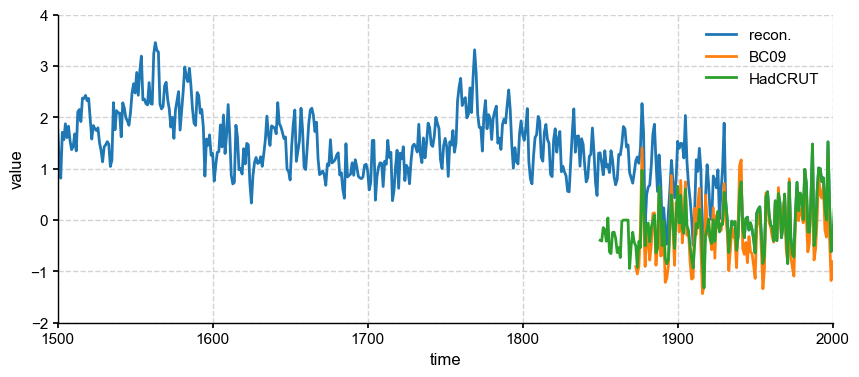

In [6]:
# plot and validate the NINO3.4
fig, ax = ts_recon.plot(mute=True, label='recon.')
ax.set_xlim(1500, 2000)
ax.set_ylim(-2, 4)
ts_target.plot(ax=ax)
ts_hadcrut.plot(ax=ax)
LMRt.showfig(fig)